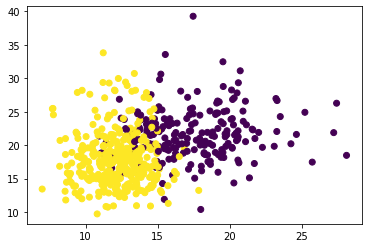

The accuracy under kernel linear is 0.929825
00:00:471603


In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from time import time
import datetime
%matplotlib inline
 
data = load_breast_cancer()
X = data.data
y = data.target
# check label
np.unique(y) 
plt.scatter(X[:,0], X[:,1],c=y)
plt.show()
 
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size=0.3, random_state=420)
kernel = ["linear","poly","rbf", "sigmod"]
for kernel in kernel:
    time0 = time()
    clf = SVC(kernel = kernel, gamma = "auto", cache_size=5000).fit(Xtrain,Ytrain) #cache_size default=200 默认使用200MB内存
    print("The accuracy under kernel %s is %f" % (kernel, clf.score(Xtest, Ytest)))
    print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))

#polynomial kernel function's time complexity is too much, so we abandon it 
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size=0.3, random_state=420)
kernel = ["linear","rbf", "sigmoid"]
for kernel in kernel:
    time0 = time()
    clf = SVC(kernel = kernel, gamma = "auto", cache_size=5000).fit(Xtrain,Ytrain) #cache_size default=200 默认使用200MB内存
    print("The accuracy under kernel %s is %f" % (kernel, clf.score(Xtest, Ytest)))
    print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))
 
 
#We can assure that the breast cancer is a linear divisible dataset 
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size=0.3, random_state=420)
kernel = ["linear","poly","rbf", "sigmoid"]
for kernel in kernel:
    time0 = time()
    clf = SVC(kernel = kernel, 
              degree = 1, #degree默认值是3，所以poly核函数跑的非常慢，
              gamma = "auto", 
              cache_size=5000).fit(Xtrain,Ytrain) #cache_size default=200 默认使用200MB内存
    print("The accuracy under kernel %s is %f" % (kernel, clf.score(Xtest, Ytest)))
    print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))
    
# we can tune the parameter since rbf shouldn't perform not good 
import pandas as pd
data = pd.DataFrame(X)
 
data.describe([0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.99]).T
 
# we need to normalize the data
from sklearn.preprocessing import StandardScaler 
X = StandardScaler().fit_transform(X)
data = pd.DataFrame(X)
data.describe([0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.99]).T
 
# run again after processing
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size=0.3, random_state=420)
kernel = ["linear","poly","rbf", "sigmoid"]
for kernel in kernel:
    time0 = time()
    clf = SVC(kernel = kernel, 
              degree = 1, 
              gamma = "auto", 
              cache_size=5000).fit(Xtrain,Ytrain) 
    print("The accuracy under kernel %s is %f" % (kernel, clf.score(Xtest, Ytest)))
    print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))

    
# find tune rbf parameter gamma
score = []
gamma_range = np.logspace(-10,1,50)
for i in gamma_range:
    clf = SVC(kernel="rbf", gamma=i, cache_size=5000).fit(Xtrain,Ytrain)
    score.append(clf.score(Xtest, Ytest))
    
print(max(score), gamma_range[score.index(max(score))])
plt.plot(gamma_range, score)
plt.show()
#We can see that the accuracy of rbf is the same as linear,but rbf's speed is fast obviously, so we choose rbf function
 
plt.plot(range(50), np.logspace(-10,1,50))
plt.show()
 
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
time0 = time()
gamma_range = np.logspace(-10, 1, 20)
coef0_range = np.linspace(0,5, 10)
param_grid = dict(gamma = gamma_range, coef0 = coef0_range)
cv = StratifiedShuffleSplit(n_splits = 5, test_size = 0.3, random_state=420)
grid = GridSearchCV(SVC(kernel="poly", degree=1, cache_size=5000),param_grid=param_grid, cv=cv)
grid.fit(X,y)
print("The best parameters are %s with score %0.5f" % (grid.best_params_,grid.best_score_))
print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))